### Import Libraries and set random seed

In [5]:
import pandas as pd
import numpy as np

### Set Random Number Seed
np.random.seed(112)

### Load the Data

In [6]:
data = pd.read_excel("Budathon_2018.xlsx")
data.head()

,Age,Sex,UPDRS,aSN_FA,Caudate_FA,CC_FA,GP_FA,LobuleVI_FA,LobuleV_FA,MCP_FA,...,LobuleVI_FW,LobuleV_FW,MCP_FW,pSN_FW,Putamen_FW,SCP_FW,STN_FW,Thalamus_FW,Vermis_FW,GroupID
0,68,1,0.0,0.645260,0.237540,0.658996,0.390937,0.199762,0.248622,0.583646,...,0.188899,0.253751,0.098390,0.173284,0.159989,0.415654,0.124107,0.160673,0.204663,0
1,53,1,0.0,0.654966,0.222827,0.607287,0.383109,0.225891,0.275686,0.635246,...,0.133954,0.140164,0.086658,0.195432,0.169670,0.308992,0.142579,0.149033,0.146168,0
2,67,0,1.0,0.674251,0.236799,0.743437,0.324580,0.224945,0.237046,0.636315,...,0.228307,0.299650,0.078886,0.137439,0.185490,0.354840,0.096919,0.140484,0.202398,0
3,46,1,4.7,0.664740,0.221283,0.702845,0.346713,0.224896,0.258485,0.632627,...,0.195933,0.161162,0.081963,0.172358,0.122145,0.380896,0.085467,0.080924,0.167342,0
4,45,0,2.0,0.656800,0.204532,0.692499,0.322482,0.250622,0.225412,0.575726,...,0.131577,0.170267,0.085887,0.244718,0.141260,0.427207,0.117136,0.156742,0.169126,0


## Controls vs Any Parkinsonism

### Group the Parkinsons subjects into a single common group

In [51]:
df = data.copy()
df.loc[df['GroupID'] != 0, 'GroupID'] = 1 

### Split into train and test sets

In [43]:
x_cols = [col for col in df.columns if col != 'GroupID']
Xd = pd.DataFrame(df, columns= x_cols)
Yd = df['GroupID']

Automatically created module for IPython interactive environment
(746,)
(150, 2)
(746,)
(149, 2)
(746,)
(149, 2)
(746,)
(149, 2)
(746,)
(149, 2)


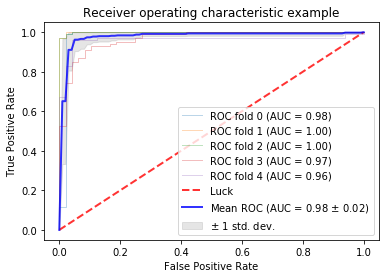

In [53]:
%matplotlib inline

print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = Xd.values
y = Yd.values

n_samples, n_features = X.shape


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    print(y.shape)
    print(probas_.shape)
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
d = pd.DataFrame(mean_fpr, mean_tpr).reset_index()
d.columns = ['X','Y']
d['sum'] = (1-d.Y) + d.X
d.sort_values('sum', ascending=False)

,X,Y,sum
1,0.983333,0.010101,1.973232
2,0.983333,0.020202,1.963131
3,0.983333,0.030303,1.953030
4,0.983333,0.040404,1.942929
5,0.983333,0.050505,1.932828
6,0.983333,0.060606,1.922727
7,0.983333,0.070707,1.912626
8,0.983333,0.080808,1.902525
9,0.983333,0.090909,1.892424
10,0.983333,0.101010,1.882323


<bound method DataFrame.sum of            X         Y       sum
0   0.000000  0.000000  1.000000
1   0.694164  0.010101  1.684063
2   0.694164  0.020202  1.673962
3   0.900794  0.030303  1.870491
4   0.900794  0.040404  1.860390
5   0.974206  0.050505  1.923701
6   0.974206  0.060606  1.913600
7   0.974206  0.070707  1.903499
8   0.976190  0.080808  1.895382
9   0.976190  0.090909  1.885281
10  0.986111  0.101010  1.885101
11  0.986111  0.111111  1.875000
12  0.986111  0.121212  1.864899
13  0.990079  0.131313  1.858766
14  0.990079  0.141414  1.848665
15  0.990079  0.151515  1.838564
16  0.990079  0.161616  1.828463
17  0.990079  0.171717  1.818362
18  0.992063  0.181818  1.810245
19  0.992063  0.191919  1.800144
20  0.992063  0.202020  1.790043
21  0.992063  0.212121  1.779942
22  0.992063  0.222222  1.769841
23  0.992063  0.232323  1.759740
24  0.992063  0.242424  1.749639
25  0.992063  0.252525  1.739538
26  0.992063  0.262626  1.729437
27  0.992063  0.272727  1.719336
28  0.992063